# Analisis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Cargar el dataset con el resultado de grafos randoms
### los "_tabu" son los experimentos de nuevo compilados con GA de sol inicial 

In [3]:
df_resultados_tabu = pd.read_csv("resultados/resultado_tabu.csv");
df_peor_caso_agm_tabu = pd.read_csv("resultados/resultado_agm_tabu.csv");


In [25]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_peor_caso_agm = pd.read_csv("resultados/resultado_agm.csv");
df_resultados_random_param = pd.read_csv("resultados/resultado_tabu_params_random.csv");
df_resultados_opt_param = pd.read_csv("resultados/resultado_tabu_params_opt.csv");
df_resultados.head()

,dataset,n,m,metodo,tiempo,costo
0,grafo-propio,3,3.0,ins,0.004666,189
1,grafo-propio,3,3.0,agm,0.009365,189
2,grafo-propio,3,3.0,GA,0.008865,189
3,grafo-propio,3,3.0,TABU_CICLOS,0.970040,189
4,grafo-propio,3,3.0,TABU_ESTRUCTURA,1.087227,189


### Dropeamos los de TABU de antes

In [27]:
df_resultados = df_resultados[((df_resultados["metodo"] != "TABU_CICLOS") & (df_resultados["metodo"] != "TABU_ESTRUCTURA"))].copy()
df_peor_caso_agm = df_peor_caso_agm[((df_peor_caso_agm["metodo"] != "TABU_CICLOS") & (df_peor_caso_agm["metodo"] != "TABU_ESTRUCTURA"))].copy()


,dataset,n,m,metodo,tiempo,costo
0,peor-caso-agm,3,3.0,ins,0.002906,196
1,peor-caso-agm,3,3.0,agm,0.008399,196
2,peor-caso-agm,3,3.0,GA,0.008851,196
5,peor-caso-agm,4,6.0,ins,0.004858,227
6,peor-caso-agm,4,6.0,agm,0.007639,351


### Le agregamos los nuevos datos TABU

In [28]:

df_resultados.append(df_resultados_tabu, ignore_index=True)
df_peor_caso_agm = df_peor_caso_agm.append(df_peor_caso_agm_tabu, ignore_index=True)


# Experimento grafos con pesos aleatorios
## Graficos para las heuristicas por:
- Tiempo en relacion al tamanio
- Costo en relacion al tamanio
- Relacion entre costo y tiempo

Estan en este orden los graficos

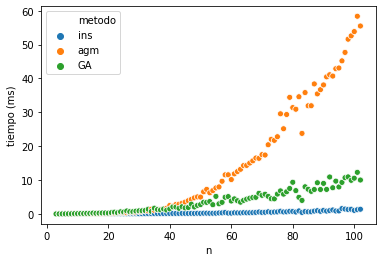

In [29]:
df_grafoPropio = df_resultados[df_resultados["dataset"]=="grafo-propio"].copy(); # lo usamos tambien abajo
fig = sns.scatterplot(data=df_grafoPropio, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

# Guardamos la figura
plt.savefig("graficos/tiempo-grafos-propios.svg");

# Graficamos segun heuristicas

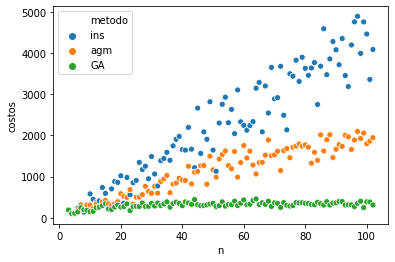

In [30]:
fig = sns.scatterplot(data=df_grafoPropio, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='costos');

plt.savefig("graficos/costo-grafos-propios.svg");
## IGUAL AL DE ARRIBA PERO CON COSTOS

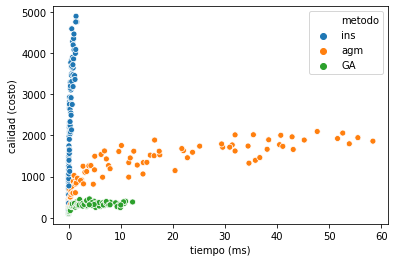

In [31]:
fig = sns.scatterplot(data=df_grafoPropio, x='tiempo', y='costo', hue='metodo');
fig.set(xlabel='tiempo (ms)', ylabel='calidad (costo)');


plt.savefig("graficos/costo-tiempo-grafos-propios.svg");

# Experimento 2, Peor caso AGM

## Cargar el dataframe de los resultados


In [34]:
df_peor_caso_agm.head()

,dataset,n,m,metodo,tiempo,costo
0,peor-caso-agm,3,3.0,ins,0.002906,196
1,peor-caso-agm,3,3.0,agm,0.008399,196
2,peor-caso-agm,3,3.0,GA,0.008851,196
3,peor-caso-agm,4,6.0,ins,0.004858,227
4,peor-caso-agm,4,6.0,agm,0.007639,351


### Costo

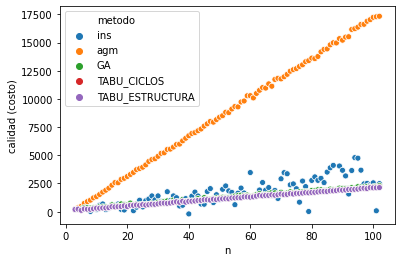

In [35]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='calidad (costo)');

plt.savefig("graficos/costo-peor-caso-agm.svg");


### Tiempo-Costo

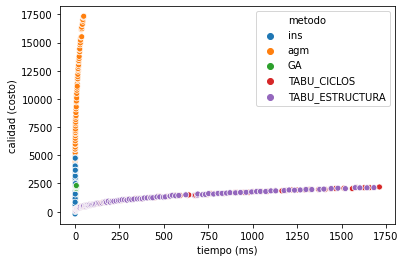

In [36]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='tiempo', y='costo', hue='metodo');
fig.set(xlabel='tiempo (ms)', ylabel='calidad (costo)');

plt.savefig("graficos/tiempo-costo-peor-caso-agm.svg");


# Experimento Gap entre optimos

In [37]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_opts.head()

,dataset,n,m,metodo,tiempo,costo,gap
0,sol_optimas,1432,1024596.0,ins,2701.703333,5246084,5093114
1,sol_optimas,1432,1024596.0,GA,13126.500000,182713,29743
2,sol_optimas,666,221445.0,ins,241.138333,7176556,6882198
3,sol_optimas,666,221445.0,GA,1349.836667,339319,44961
4,sol_optimas,1304,849556.0,ins,3108.366667,15864143,15611195


### Costo con TABU, sin TABU

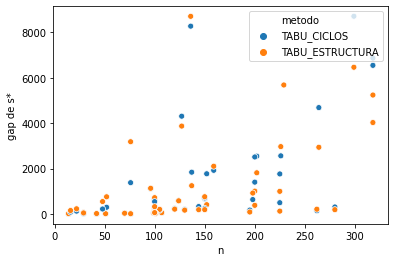

In [40]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_opts = df_opts[(df_opts["n"] < 400) & (df_opts["gap"]<10000 ) &((df_opts["metodo"] == "TABU_CICLOS") | (df_opts["metodo"] == "TABU_ESTRUCTURA"))]
fig = sns.scatterplot(data=df_opts, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap de s*');

plt.savefig("graficos/gap-heuristicas.svg");


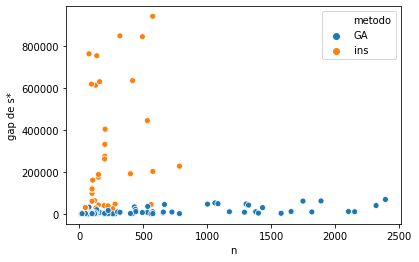

In [41]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[(df_opts["gap"] < 1000000) & (df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA")& (df_opts["metodo"] != "agm")]
fig = sns.scatterplot(data=df_optt, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap de s*');

plt.savefig("graficos/gap-heuristicas-sinTABU.svg");

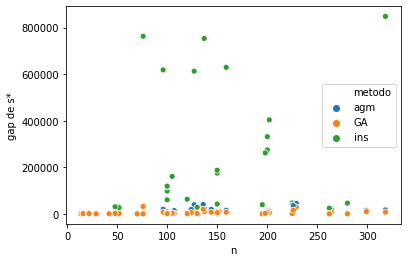

In [42]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[(df_opts["n"] < 400) & (df_opts["gap"] < 1000000) & (df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA")]
fig = sns.scatterplot(data=df_optt, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap de s*');

plt.savefig("graficos/gap-heuristicas-sinTABU-cerca.svg");

### Tiempo

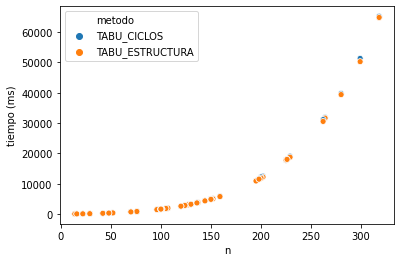

In [43]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[(df_opts["n"] < 400) & ((df_opts["metodo"] == "TABU_CICLOS") | (df_opts["metodo"] == "TABU_ESTRUCTURA"))]
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-heuristicas.svg");


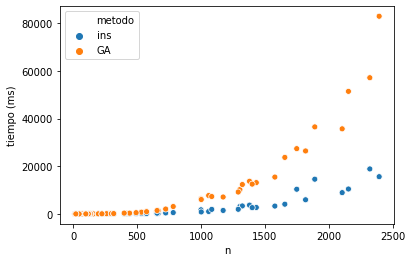

In [44]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[(df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA") & (df_opts["metodo"] != "agm")]
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-heuristicas-sinTABU.svg");

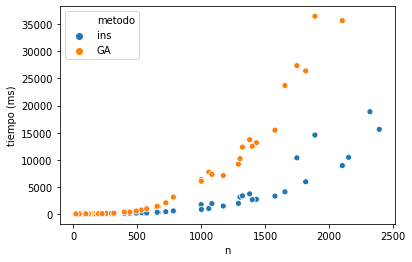

In [45]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[(df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA") & (df_opts["metodo"] != "agm")]
df_optt = df_optt[df_optt["tiempo"] < 40000]
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-heuristicas-sinTABU-zoom.svg");

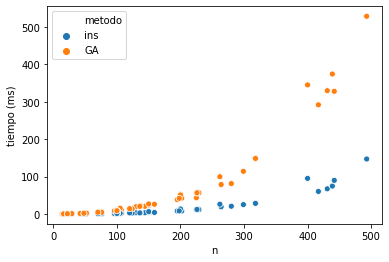

In [46]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[(df_opts["n"] < 500) & (df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA")& (df_opts["metodo"] != "agm")]
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-heuristicas-sinTABU-cerca.svg");

# Experimento TABU_CICLOS parametros para grafo random G100


In [47]:
ciclos_random_param = df_resultados_random_param[df_resultados_random_param["metodo"].str.contains("TABU_CICLOS", na=False)].copy();
ciclos_random_param = ciclos_random_param[(ciclos_random_param["memoria"] > 0) & (ciclos_random_param["vecindad"] > 0)] 
ciclos_random_param.head()

,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones
0,grafo-propio,100,4950.0,TABU_CICLOS 10 10 100,103.101,322,10,10,100
1,grafo-propio,100,4950.0,TABU_CICLOS 10 10 150,115.160,322,10,10,150
2,grafo-propio,100,4950.0,TABU_CICLOS 10 10 200,153.378,322,10,10,200
3,grafo-propio,100,4950.0,TABU_CICLOS 10 10 250,189.446,280,10,10,250
4,grafo-propio,100,4950.0,TABU_CICLOS 10 10 300,224.443,280,10,10,300


## VECINDAD

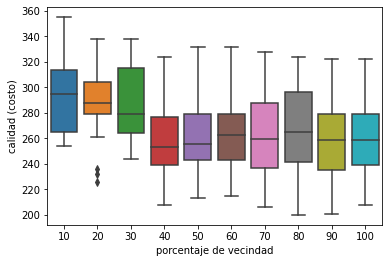

In [48]:
fig = sns.boxplot(data=ciclos_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/ciclos-vecindad-costo.svg");

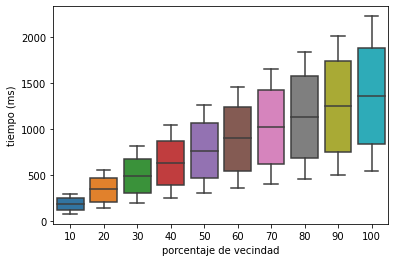

In [49]:
fig = sns.boxplot(data=ciclos_random_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-vecindad-tiempo.svg");

## MEMORIA

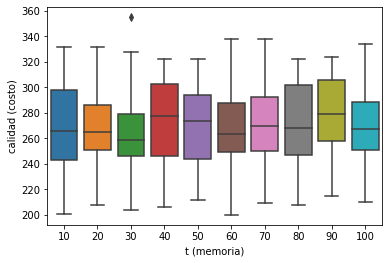

In [50]:
fig = sns.boxplot(data=ciclos_random_param, x='memoria', y='costo');
fig.set(xlabel='t (memoria)', ylabel='calidad (costo)');

plt.savefig("graficos/ciclos-memoria-costo.svg");

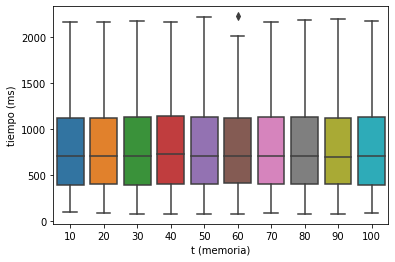

In [51]:
fig = sns.boxplot(data=ciclos_random_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-memoria-tiempo.svg");

### ITERACIONES

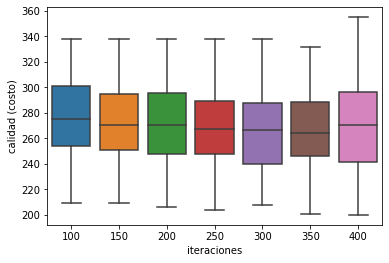

In [52]:
fig = sns.boxplot(data=ciclos_random_param, x='iteraciones', y='costo');
fig.set(xlabel='iteraciones', ylabel='calidad (costo)');

plt.savefig("graficos/ciclos-iteraciones-costo.svg");

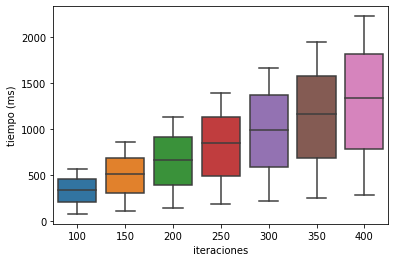

In [53]:
fig = sns.boxplot(data=ciclos_random_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-iteraciones-tiempo.svg");

# RANDOMS CON TABU_ESTRUCTURA

In [54]:
estructura_random_param = df_resultados_random_param[df_resultados_random_param["metodo"].str.contains("TABU_ESTRUCTURA", na=False)].copy();
estructura_random_param = estructura_random_param[(estructura_random_param["memoria"] > 0) & (estructura_random_param["vecindad"] > 0)] 
estructura_random_param.head()

,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones
700,grafo-propio,100,4950.0,TABU_ESTRUCTURA 10 10 100,79.9858,325,10,10,100
701,grafo-propio,100,4950.0,TABU_ESTRUCTURA 10 10 150,115.4020,325,10,10,150
702,grafo-propio,100,4950.0,TABU_ESTRUCTURA 10 10 200,149.8080,325,10,10,200
703,grafo-propio,100,4950.0,TABU_ESTRUCTURA 10 10 250,184.7340,325,10,10,250
704,grafo-propio,100,4950.0,TABU_ESTRUCTURA 10 10 300,214.7470,288,10,10,300


### VECINDAD

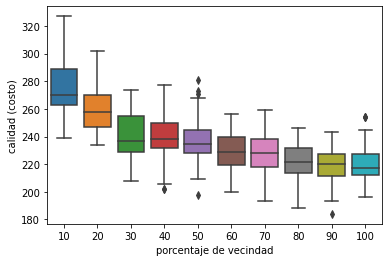

In [55]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/estructura-vecindad-costo.svg");

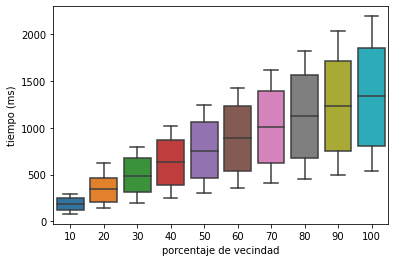

In [56]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-vecindad-tiempo.svg");

### MEMORIA

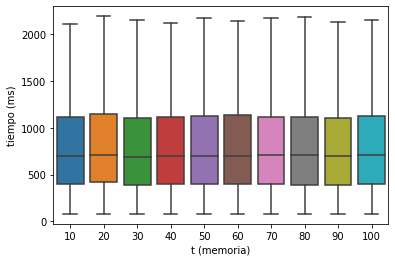

In [57]:
fig = sns.boxplot(data=estructura_random_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-memoria-tiempo.svg");

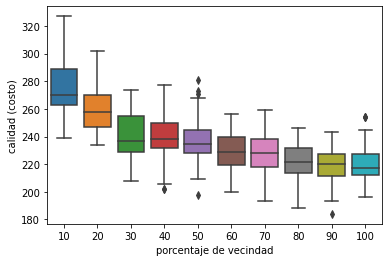

In [58]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/estructura-vecindad-costo.svg");

### ITERACIONES

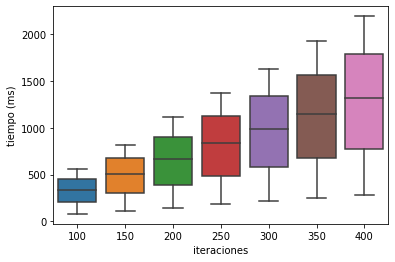

In [59]:
fig = sns.boxplot(data=estructura_random_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-iteraciones-tiempo.svg");

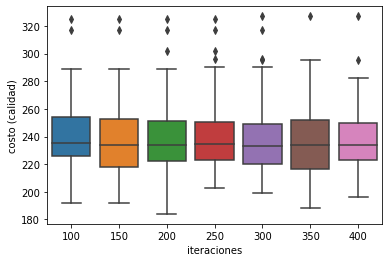

In [60]:
fig = sns.boxplot(data=estructura_random_param, x='iteraciones', y='costo');
fig.set(xlabel='iteraciones', ylabel='costo (calidad)');

plt.savefig("graficos/estructura-iteraciones-costo.svg");

# Experimento TABU_CICLOS parametros para instancia linhp318

In [61]:
optimo_linhp = 41345

In [62]:
ciclos_opt_param = df_resultados_opt_param[df_resultados_opt_param["metodo"].str.contains("TABU_CICLOS")]
ciclos_opt_param = ciclos_opt_param[(ciclos_opt_param["memoria"] > 0)]
ciclos_opt_param["gap"] = ciclos_opt_param["costo"] - optimo_linhp
ciclos_opt_param.head()

,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones,gap
0,sol_optimas,318,50403.0,TABU_CICLOS 40 10 100,4417.19,48897,40,10,100,7552
1,sol_optimas,318,50403.0,TABU_CICLOS 40 10 200,8416.71,48939,40,10,200,7594
2,sol_optimas,318,50403.0,TABU_CICLOS 40 10 300,12639.10,48182,40,10,300,6837
3,sol_optimas,318,50403.0,TABU_CICLOS 40 10 400,16333.40,49394,40,10,400,8049
4,sol_optimas,318,50403.0,TABU_CICLOS 40 30 100,10875.90,48897,40,30,100,7552


### VECINDAD

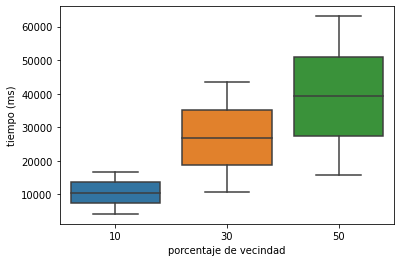

In [63]:
fig = sns.boxplot(data=ciclos_opt_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-vecindad-tiempo-opt.svg");

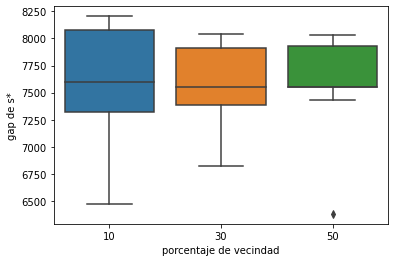

In [64]:
fig = sns.boxplot(data=ciclos_opt_param, x='vecindad', y='gap');
fig.set(xlabel='porcentaje de vecindad', ylabel='gap de s*');

plt.savefig("graficos/ciclos-vecindad-gap-opt.svg");

### MEMORIA

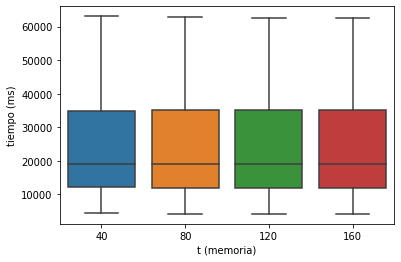

In [65]:
fig = sns.boxplot(data=ciclos_opt_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-memoria-tiempo-opt.svg");

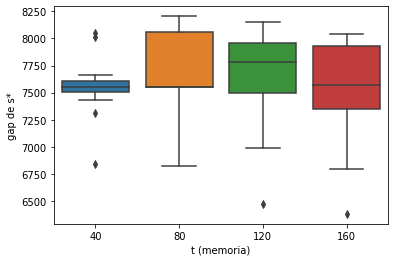

In [66]:
fig = sns.boxplot(data=ciclos_opt_param, x='memoria', y='gap');
fig.set(xlabel='t (memoria)', ylabel='gap de s*');

plt.savefig("graficos/ciclos-memoria-gap-opt.svg");

### ITERACIONES

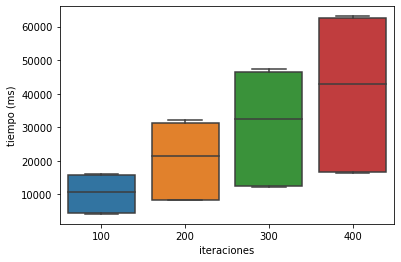

In [67]:
fig = sns.boxplot(data=ciclos_opt_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/ciclos-iteraciones-tiempo-opt.svg");

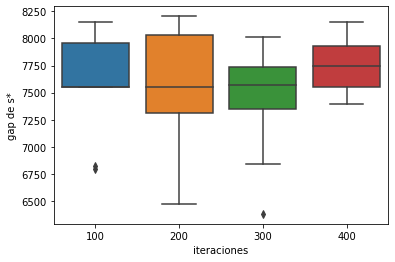

In [68]:
fig = sns.boxplot(data=ciclos_opt_param, x='iteraciones', y='gap');
fig.set(xlabel='iteraciones', ylabel='gap de s*');

plt.savefig("graficos/ciclos-iteraciones-costo-opt.svg");

# Experimento TABU_ESTRUCTURA parametros para instancia linhp318

In [69]:
estructura_opt_param = df_resultados_opt_param[df_resultados_opt_param["metodo"].str.contains("TABU_ESTRUCTURA")]
estructura_opt_param = estructura_opt_param[(estructura_opt_param["memoria"] > 0)]
estructura_opt_param["gap"] = estructura_opt_param["costo"] - optimo_linhp
estructura_opt_param.head()

,dataset,n,m,metodo,tiempo,costo,memoria,vecindad,iteraciones,gap
48,sol_optimas,318,50403.0,TABU_ESTRUCTURA 40 10 100,4291.57,47365,40,10,100,6020
49,sol_optimas,318,50403.0,TABU_ESTRUCTURA 40 10 200,8205.88,45631,40,10,200,4286
50,sol_optimas,318,50403.0,TABU_ESTRUCTURA 40 10 300,12147.90,45522,40,10,300,4177
51,sol_optimas,318,50403.0,TABU_ESTRUCTURA 40 10 400,16223.00,45611,40,10,400,4266
52,sol_optimas,318,50403.0,TABU_ESTRUCTURA 40 30 100,10897.20,47500,40,30,100,6155


### VECINDAD

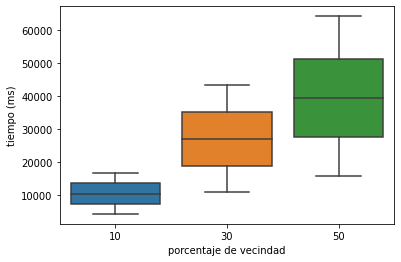

In [70]:
fig = sns.boxplot(data=estructura_opt_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-vecindad-tiempo-opt.svg");

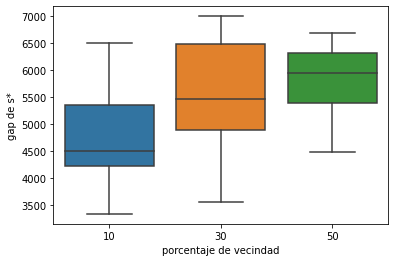

In [71]:
fig = sns.boxplot(data=estructura_opt_param, x='vecindad', y='gap');
fig.set(xlabel='porcentaje de vecindad', ylabel='gap de s*');

plt.savefig("graficos/estructura-vecindad-gap-opt.svg");

### MEMORIA

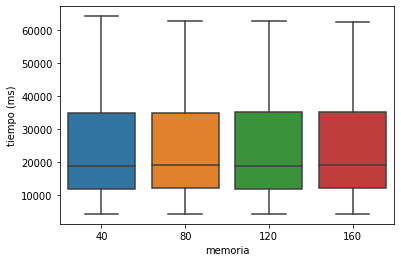

In [72]:
fig = sns.boxplot(data=estructura_opt_param, x='memoria', y='tiempo');
fig.set(xlabel='memoria', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-memoria-tiempo-opt.svg");

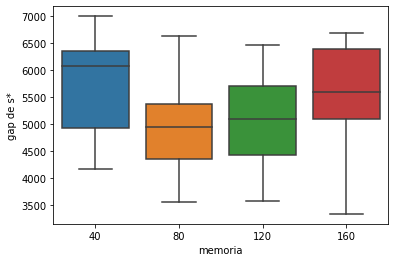

In [73]:
fig = sns.boxplot(data=estructura_opt_param, x='memoria', y='gap');
fig.set(xlabel='memoria', ylabel='gap de s*');

plt.savefig("graficos/estructura-memoria-gap-opt.svg");

### ITERACIONES

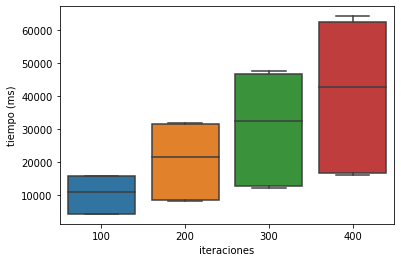

In [74]:
fig = sns.boxplot(data=estructura_opt_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/estructura-iteraciones-tiempo-opt.svg");

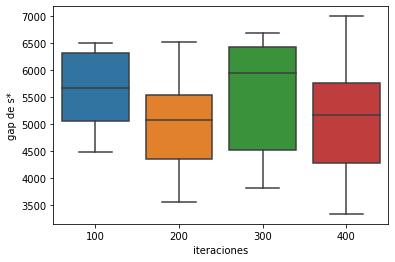

In [75]:
fig = sns.boxplot(data=estructura_opt_param, x='iteraciones', y='gap');
fig.set(xlabel='iteraciones', ylabel='gap de s*');

plt.savefig("graficos/estructura-iteraciones-gap-opt.svg");

In [76]:
bot_kill


NameError: name 'bot_kill' is not defined